In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
#결측치 처리
train_df.info() # Age
train_df.Age = train_df.Age.fillna(train_df.Age.dropna().median)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

In [103]:
train_df.loc[train_df.Cabin.isnull()==False] # factor형 자료 결측치 제거

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S


In [3]:
df = pd.DataFrame(train_df['Age'].groupby(pd.cut(train_df.Age,4)).count())
df.columns = ['Count']
df

,Count
Age,
"(0.34, 20.315]",179
"(20.315, 40.21]",385
"(40.21, 60.105]",128
"(60.105, 80.0]",22


In [4]:
df.index.name = 'AgeBand'
df

,Count
AgeBand,
"(0.34, 20.315]",179
"(20.315, 40.21]",385
"(40.21, 60.105]",128
"(60.105, 80.0]",22


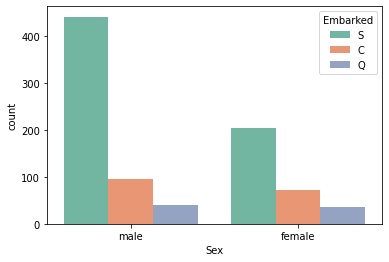

In [5]:
ax = sns.countplot(x='Sex', hue='Embarked', data=train_df, palette='Set2')

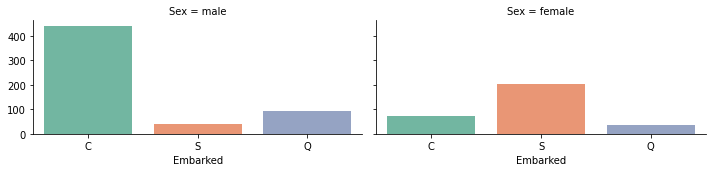

In [6]:
grid=sns.FacetGrid(col="Sex",aspect=2.0, height=2.5, data=train_df)
grid.map(sns.countplot,"Embarked", data=train_df, order=None, palette="Set2")

<AxesSubplot:>

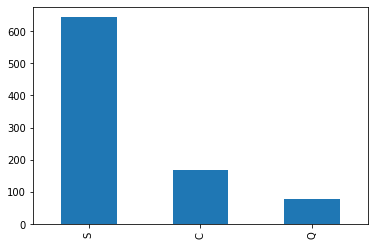

In [7]:
train_df['Embarked'].value_counts().plot(kind='bar')

In [8]:
import re
text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
phone_number_list=re.compile('\d{2,3}-\d{3,4}-\d{4}').finditer(text)
phone_number_list=[x.group() for x in phone_number_list]

In [9]:
phone_number_list

['00-111-2222', '333-4444-5555']

In [10]:
def getMobile(s):
    header = ['010','011','016','017','018','019']
    ans = ''
    for i in range(len(s)):
        if s[i].isnumeric():
            ans = ans + s[i]
    if len(ans)==10 or len(ans)==11:
        if ans[:3] not in header:
            return False
    else:
        return False
    return ans

In [11]:
temp = '0102039'
temp[0].isnumeric()

True

In [12]:
def Mobile(s):
    ans = ''
    for i in range(len(s)):
        if s[i].isnumeric()==True:
            ans = ans+s[i]
    if len(ans)==10 or len(ans)==11:
        pass
        if ans[:2] != '01':
            return False
    else:
        return False
        
    return ans

In [13]:
print(Mobile("010-1234-5555"))
print(Mobile("019-2930-1223"))
print(Mobile("1002331234"))

01012345555
01929301223
False


In [14]:
measure = pd.read_csv("Measurement_info.csv")
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [15]:
measure.describe(include='all')

,Measurement date,Station code,Item code,Average value,Instrument status
count,3885066,3.885066e+06,3.885066e+06,3.885066e+06,3.885066e+06
unique,25906,NaN,NaN,NaN,NaN
top,2018-10-21 05:00,NaN,NaN,NaN,NaN
freq,150,NaN,NaN,NaN,NaN
mean,NaN,1.130002e+02,5.333333e+00,1.161132e+01,1.471890e-01
std,NaN,7.211310e+00,2.748737e+00,3.816098e+01,1.021642e+00
min,NaN,1.010000e+02,1.000000e+00,-1.000000e+00,0.000000e+00
25%,NaN,1.070000e+02,3.000000e+00,1.200000e-02,0.000000e+00
50%,NaN,1.130000e+02,5.500000e+00,7.000000e-02,0.000000e+00
75%,NaN,1.190000e+02,8.000000e+00,1.500000e+01,0.000000e+00


In [16]:
pd.qcut(measure['Average value'],4).unique()

[(-1.001, 0.012], (0.012, 0.07], (0.07, 15.0], (15.0, 6256.0]]
Categories (4, interval[float64]): [(-1.001, 0.012] < (0.012, 0.07] < (0.07, 15.0] < (15.0, 6256.0]]

In [17]:
measure['so2']='great'
measure.loc[(0.012<measure['Average value']) & (measure['Average value']<=0.07),'so2']='good'
measure.loc[(0.07<measure['Average value']) & (measure['Average value']<=15.0), 'so2']='normal'
measure.loc[15.0<measure['Average value'],'so2']='bad'

In [18]:
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2
0,2017-01-01 00:00,101,1,0.004,0,great
1,2017-01-01 00:00,101,3,0.059,0,good
2,2017-01-01 00:00,101,5,1.200,0,normal
3,2017-01-01 00:00,101,6,0.002,0,great
4,2017-01-01 00:00,101,8,73.000,0,bad


In [26]:
import datetime
measure['Weekday'] = measure['Measurement date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M').weekday())
measure.replace({"Weekday": {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}}, inplace=True) ## { } 안에 {} !
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2,Weekday
0,2017-01-01 00:00,101,1,0.004,0,great,Sun
1,2017-01-01 00:00,101,3,0.059,0,good,Sun
2,2017-01-01 00:00,101,5,1.200,0,normal,Sun
3,2017-01-01 00:00,101,6,0.002,0,great,Sun
4,2017-01-01 00:00,101,8,73.000,0,bad,Sun


In [24]:
help(datetime.datetime.weekday)

Help on method_descriptor:

weekday(...)
    Return the day of the week represented by the date.
    Monday == 0 ... Sunday == 6



In [124]:
import time
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

In [27]:
result = pd.crosstab(measure['Weekday'], measure['so2'])

In [140]:
# result.index = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"] # index 바꾸고 싶을 때

In [28]:
result

so2,bad,good,great,normal
Weekday,,,,
Fri,135143,138977,139407,142925
Mon,135372,137876,142591,143559
Sat,136855,135342,138581,138822
Sun,134355,133977,141621,142647
Thu,134754,137171,140592,141559
Tue,140708,136662,143858,138872
Wed,137714,137754,140074,137298


In [29]:
result.reindex(columns=["bad","normal",'good','great'])
result.reindex(index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

so2,bad,good,great,normal
Weekday,,,,
Mon,135372,137876,142591,143559
Tue,140708,136662,143858,138872
Wed,137714,137754,140074,137298
Thu,134754,137171,140592,141559
Fri,135143,138977,139407,142925
Sat,136855,135342,138581,138822
Sun,134355,133977,141621,142647


In [143]:
result.to_csv("myresult.csv", index=True, encoding='utf8')

<AxesSubplot:xlabel='Weekday', ylabel='count'>

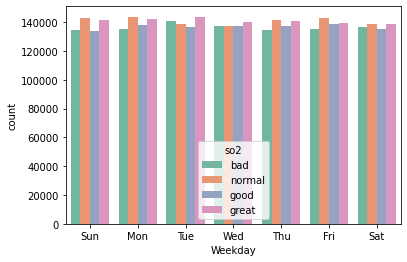

In [33]:
sns.countplot("Weekday", hue="so2", data=measure, palette='Set2', hue_order=["bad","normal",'good','great'])

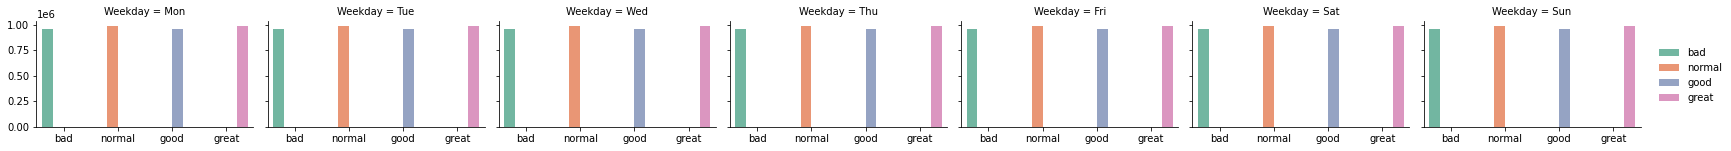

In [84]:
grid = sns.FacetGrid(col="Weekday", height=2.2, aspect=1.5, data=measure, col_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
grid.map(sns.countplot, x="so2", hue="so2", data=measure, palette="Set2", order=["bad","normal",'good','great'],hue_order=["bad","normal",'good','great'])
grid.add_legend()

In [85]:
happiness = pd.read_csv("2015.csv")
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [93]:
table2 = happiness[['Country','Happiness Score']]
happiness.drop(['Happiness Score'], axis=1, inplace=True)

In [111]:
df = pd.concat([happiness, table2], axis=1)

In [112]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label=LabelEncoder()
df["Region_c"] = label.fit_transform(df['Region'])
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country,Happiness Score,Region_c
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Switzerland,7.587,9
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Iceland,7.561,9
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Denmark,7.527,9
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Norway,7.522,9
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Canada,7.427,5


In [113]:
df.drop(['Country', 'Happiness Rank','Standard Error','Dystopia Residual', 'Region'], axis=1, inplace=True)
df.columns = ["Region",'Happiness','GDP','Family','LifeExp','Freedom','GovCorr','Generosity']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Happiness"], axis=1),df["Happiness"])

In [115]:
X_train.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity
33,0.96690,0.73850,0.55664,0.03187,0.57630,6.455,6
118,0.26673,0.38847,0.24425,0.17175,0.46187,4.518,3
10,1.22857,0.91387,0.41319,0.07785,0.33172,7.278,4
135,0.54649,0.40064,0.35571,0.07854,0.09131,4.077,4
77,0.65435,0.16007,0.34334,0.04030,0.27233,5.268,8


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pipe = make_pipeline(StandardScaler(),
                     LinearRegression(normalize=True))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.5425168740978998
0.6781257798690747


In [172]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7171119280428652
0.6847528711055673


In [171]:
pipe.named_steps.linearregression.coef_

array([ 0.10287089, -0.06713708,  0.04073557, -0.02723967,  0.00928905,
        0.13788587, -0.03000909])

In [156]:
coef = zip(X_train.columns, lm.coef_)
pd.DataFrame(coef)

,0,1
0,Region,0.259187
1,GDP,-0.269047
2,Family,0.288016
3,LifeExp,-0.242196
4,Freedom,0.073451
5,GovCorr,0.125540
6,Generosity,-0.009994


In [130]:
df.corr()

,Region,Happiness,GDP,Family,LifeExp,Freedom,GovCorr,Generosity
Region,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.780966,-0.260139
Happiness,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.740605,-0.168533
GDP,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.724200,-0.357508
Family,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.568211,0.092567
LifeExp,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,0.395199,0.165040
Freedom,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,0.180319,0.273557
GovCorr,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,1.000000,-0.176791
Generosity,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.176791,1.000000


In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Happiness", "LifeExp","Freedom","Generosity"], axis=1),df["Happiness"])

In [187]:
pipe = make_pipeline(StandardScaler(),
                     LinearRegression(normalize=True))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.637931125414346
0.5478425710261156


In [184]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.6829309928128705
0.5029437468276124


In [186]:
df[df_dummy.columns] = df_dummy
df.drop("Region", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Happiness"], axis=1),df["Happiness"])
X_train.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
66,1.20813,0.92356,0.40672,0.06146,0.30638,5.689,9,0,0,0,0,0,0,0,0,0,1
103,1.12094,0.75905,0.32112,0.02758,0.12800,4.800,1,0,1,0,0,0,0,0,0,0,0
89,0.70532,0.58114,0.62545,0.12279,0.24991,5.073,6,0,0,0,0,0,0,1,0,0,0
12,1.33723,0.89042,0.62433,0.18676,0.33088,7.200,9,0,0,0,0,0,0,0,0,0,1
146,0.20824,0.46721,0.19184,0.08124,0.21333,3.681,8,0,0,0,0,0,0,0,0,1,0


In [188]:
pipe = make_pipeline(StandardScaler(),
                     LinearRegression(normalize=True))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.637931125414346
0.5478425710261156
0.7485051008639922
0.4732685095874636


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Happiness", "LifeExp","Freedom","Generosity"], axis=1),df["Happiness"])

In [191]:
pipe = make_pipeline(StandardScaler(),
                     LinearRegression(normalize=True))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.65078048995584
0.5089234726647733
0.7403683479894794
0.49431084288993044


In [208]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     14.91
Date:                Sat, 29 May 2021   Prob (F-statistic):           2.30e-18
Time:                        22:39:45   Log-Likelihood:                 48.609
No. Observations:                 118   AIC:                            -69.22
Df Residuals:                     104   BIC:                            -30.43
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Region                              0.2756      0.087      3.152      0.002       0.102       0.449
GDP                                -0.0780      0.167     -0.468      0.641      -0.408       0.252
Family                              0.1118      0.144      0.777      0.439      -0.174       0.397
GovCorr                             0.1065      0.028      3.794      0.000       0.051       0.162
Australia and New Zealand           0.1821      0.236      0.772      0.442      -0.286       0.650
Central and Eastern Europe          0.2506      0.158      1.589      0.115      -0.062       0.563
Eastern Asia                        0.2226      0.185      1.204      0.231      -0.144       0.589
Latin America and Caribbean         0.1984      0.170      1.169      0.245      -0.138       0.535
Middle East and Northern Africa     0.0802      0.155      0.519      0.605      -0.226       0.387
North America                       0.1659      0.265      0.625      0.533      -0.360       0.692
Southeastern Asia                   0.1870      0.167      1.122      0.264      -0.143       0.518
Southern Asia                      -0.0187      0.155     -0.121      0.904      -0.326       0.288
Sub-Saharan Africa                  0.2202      0.109      2.019      0.046       0.004       0.436
Western Europe                      0.1858      0.197      0.945      0.347      -0.204       0.576
==============================================================================
Omnibus:                       14.895   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.671
Skew:                          -0.589   Prob(JB):                     7.24e-06
Kurtosis:                       4.851   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

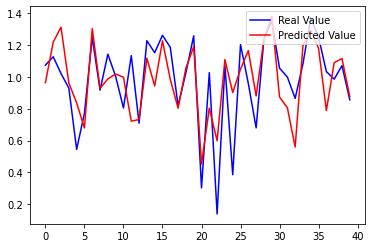

In [227]:
y_pred = model.predict(X_test)
compare = pd.DataFrame({'pred':y_pred,'real':y_test})
import matplotlib.pyplot as plt

x = len(compare)

plt.plot(range(x), compare['real'], c='b',  label='Real Value')
plt.plot(range(x), compare['pred'], c='r',  label='Predicted Value')
plt.legend(loc='upper right')

In [214]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [ ]:
#이미지 데이터 전처리
X_train.reshape(-1,32*32*3) # 3차원 -> 1치원
X_train.reshape(-1,32*32*3)/255 # 정규화

In [192]:
# CV 이용해서 분류모델 만들기

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline([('lr', LogisticRegression(solver='lbfgs')),
                      ('scale', StandardScaler())])
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
cv = GridSearchCV(pipe, params, cv=3)
cv.fit(X_train, y_train)

cv.best_params_
cv.best_score_

y_pred = cv.predict(X_test)
acc = cv.score(X_test, y_test)


AttributeError: 'bool' object has no attribute 'astype'

In [ ]:
# threshold 잡아서 class prediction

decisions = (lr.predict_proba() >= mythreshold).astype(int)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 2)
clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool)